In [260]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

data = np.array( [ [1.0, 1.0],
                   [1.5, 1.5],
                   [5.0, 5.0],
                   [3.0, 4.0],
                   [4.0, 4.0],
                   [3.0, 3.5] ])
names = ['A','B','C','D','E','F']

(0.0, 6.0)

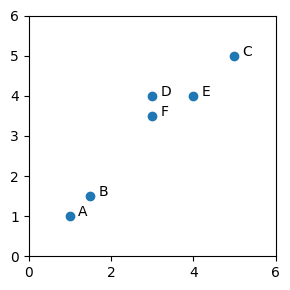

In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(3,3), tight_layout=True)
ax.scatter(data[:,0], data[:,1]);
for l, (x,y) in zip(names,data):
    ax.text(x+.2,y, l)
ax.set_xlim([0,6])
ax.set_ylim([0,6])

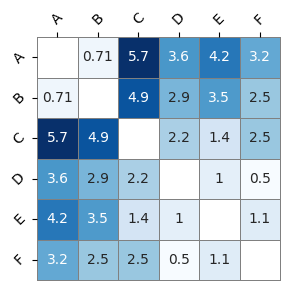

In [262]:
from scipy.spatial.distance import pdist, squareform

D = squareform(pdist(data, metric="euclidean"))
np.fill_diagonal(D, np.nan)

def plot_D(D, ax):
    sns.heatmap(D, annot=True, cmap="Blues", cbar=False, 
                   linecolor="gray", linewidth=.5, clip_on=False, 
                   ax=ax)
    ax.set_yticklabels(names,rotation=45)
    ax.set_xticklabels(names,rotation=45)
    ax.xaxis.tick_top()

fig, ax = plt.subplots(figsize=(3,3), tight_layout=True)
plot_D(D, ax)

In [263]:
def merge_clusters(D, names):
    Ci, Cj = np.unravel_index( np.nanargmin(D), D.shape)
    print ("Merging",names[ Ci], "with", names[ Cj ] )
    # update clusters
    names[Ci]+= "+"+names[Cj]
    names[Cj] = ""
    D[Ci, :] = D[:, Ci] = np.nanmin( [D[:, Ci], D[:, Cj]], axis=0)
    D[:, Cj] = D[Cj, :] = np.nan
    D[Ci,Ci] = np.nan


Merging D with F
Merging A with B
Merging D+F with E
Merging C with D+F+E
Merging A+B with C+D+F+E


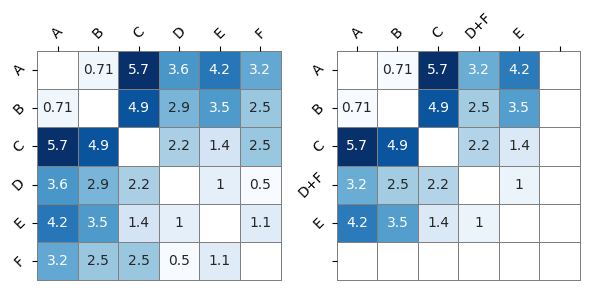

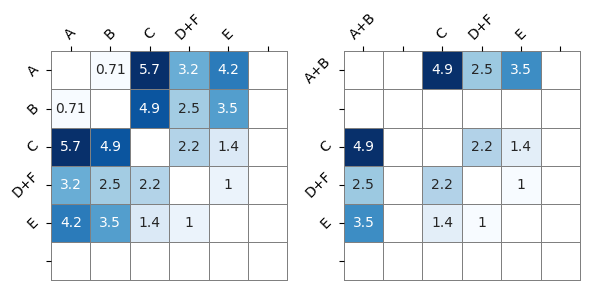

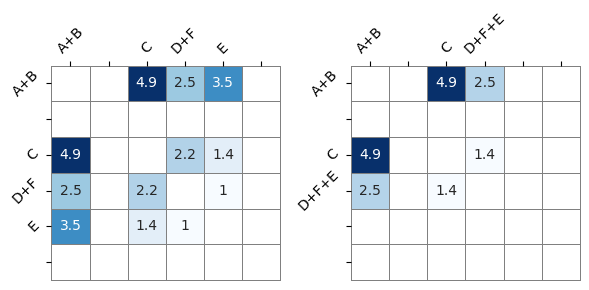

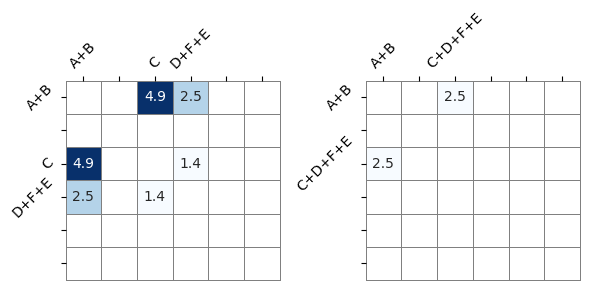

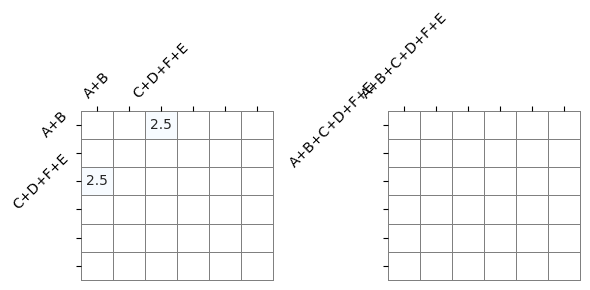

In [264]:
while not np.isnan(D).all():
    fig, ax = plt.subplots(1, 2, figsize=(6,3), tight_layout=True)
    plot_D(D, ax[0])
    merge_clusters(D, names)
    plot_D(D, ax[1])
    